<a href="https://colab.research.google.com/github/Copperhorse/edge_iiot/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing data and necesscary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score,  make_scorer,matthews_corrcoef

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data(3).csv')

In [ ]:
df.head()

,icmp.checksum,icmp.seq_le,http.content_length,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.flags,tcp.len,tcp.seq,udp.stream,...,http.request.version-0.0,dns.qry.name.len-0,dns.qry.name.len-0.0,mqtt.conack.flags-0,mqtt.conack.flags-0.0,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.topic-0,mqtt.topic-0.0,Attack_type
0,0.0,0.0,0.0,0.0,0.000000e+00,4091.0,4.0,0.0,6.0,0.0,...,True,True,False,True,False,True,False,True,False,Normal
1,0.0,0.0,0.0,179786.0,2.371804e+09,64936.0,16.0,0.0,45912520.0,0.0,...,True,True,False,True,False,True,False,True,False,Normal
2,0.0,0.0,0.0,15.0,5.158175e+08,59286.0,16.0,0.0,1.0,0.0,...,True,True,False,True,False,True,False,True,False,Normal
3,0.0,0.0,0.0,6.0,9.893551e+08,49172.0,16.0,0.0,59.0,0.0,...,True,True,False,True,False,True,False,True,False,Normal
4,0.0,0.0,0.0,0.0,0.000000e+00,50141.0,2.0,0.0,0.0,0.0,...,True,True,False,True,False,True,False,True,False,Normal


In [ ]:
y = df['Attack_type']
X = df.drop('Attack_type', axis=1)

In [ ]:
X_train , X_temp , y_train , y_temp = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_val , X_test , y_val , y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [ ]:
class_weights_multi = class_weight.compute_class_weight(class_weight='balanced',
                                        classes=np.unique(y_train),
                                        y=y_train)
class_weights_multi_dict = dict(zip(np.unique(y_train), class_weights_multi))

In [ ]:
print(class_weights_multi_dict)

{'Backdoor': np.float64(5.341640880404189), 'DDoS_HTTP': np.float64(2.6245024523067144), 'DDoS_ICMP': np.float64(1.8747412275050466), 'DDoS_TCP': np.float64(2.539243746364165), 'DDoS_UDP': np.float64(1.048585057826281), 'Fingerprinting': np.float64(149.77803921568628), 'MITM': np.float64(345.25107344632767), 'Normal': np.float64(0.09333478735938178), 'Password': np.float64(2.5517128492926457), 'Port_Scanning': np.float64(6.3767259370565155), 'Ransomware': np.float64(13.133341929937675), 'SQL_injection': np.float64(2.493733574914712), 'Uploading': np.float64(3.4668482084099215), 'Vulnerability_scanner': np.float64(2.538610834164174), 'XSS': np.float64(8.406162649939475)}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to all unique attack types
all_attack_types = pd.concat([y_train, y_val, y_test]).unique()
label_encoder.fit(all_attack_types)

# Transform the attack type columns to numerical labels
y_multi_train = label_encoder.transform(y_train)
y_multi_val = label_encoder.transform(y_val)
y_multi_test = label_encoder.transform(y_test)

# Now apply to_categorical
y_multi_train = to_categorical(y_multi_train)
y_multi_val = to_categorical(y_multi_val)
y_multi_test = to_categorical(y_multi_test)

In [ ]:
len(class_weights_multi_dict)
print(class_weights_multi_dict)

{'Backdoor': np.float64(5.341640880404189), 'DDoS_HTTP': np.float64(2.6245024523067144), 'DDoS_ICMP': np.float64(1.8747412275050466), 'DDoS_TCP': np.float64(2.539243746364165), 'DDoS_UDP': np.float64(1.048585057826281), 'Fingerprinting': np.float64(149.77803921568628), 'MITM': np.float64(345.25107344632767), 'Normal': np.float64(0.09333478735938178), 'Password': np.float64(2.5517128492926457), 'Port_Scanning': np.float64(6.3767259370565155), 'Ransomware': np.float64(13.133341929937675), 'SQL_injection': np.float64(2.493733574914712), 'Uploading': np.float64(3.4668482084099215), 'Vulnerability_scanner': np.float64(2.538610834164174), 'XSS': np.float64(8.406162649939475)}


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_multi_train)
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_multi_test, y_pred_rf)
accuracy_train_rf = accuracy_score(y_multi_train, y_train_pred_rf)





In [ ]:
print("Testing accuracy of the random forest is:",accuracy_rf)
print("Training accuracy of the random forest is:",accuracy_train_rf)

Testing accuracy of the random forest is: 0.9802794185413263
Training accuracy of the random forest is: 0.9992079783418077


In [ ]:
print(classification_report(y_multi_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2528
           1       0.94      0.93      0.93      4823
           2       1.00      1.00      1.00      6860
           3       1.00      1.00      1.00      4971
           4       1.00      1.00      1.00     12267
           5       0.88      0.78      0.83        76
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00    136263
           8       0.84      0.80      0.82      4950
           9       0.96      1.00      0.98      2024
          10       0.95      0.91      0.93       946
          11       0.84      0.81      0.82      4956
          12       0.85      0.77      0.81      3707
          13       0.99      0.96      0.97      5070
          14       0.84      0.83      0.84      1500

   micro avg       0.99      0.98      0.98    190968
   macro avg       0.94      0.92      0.93    190968
weighted avg       0.98   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


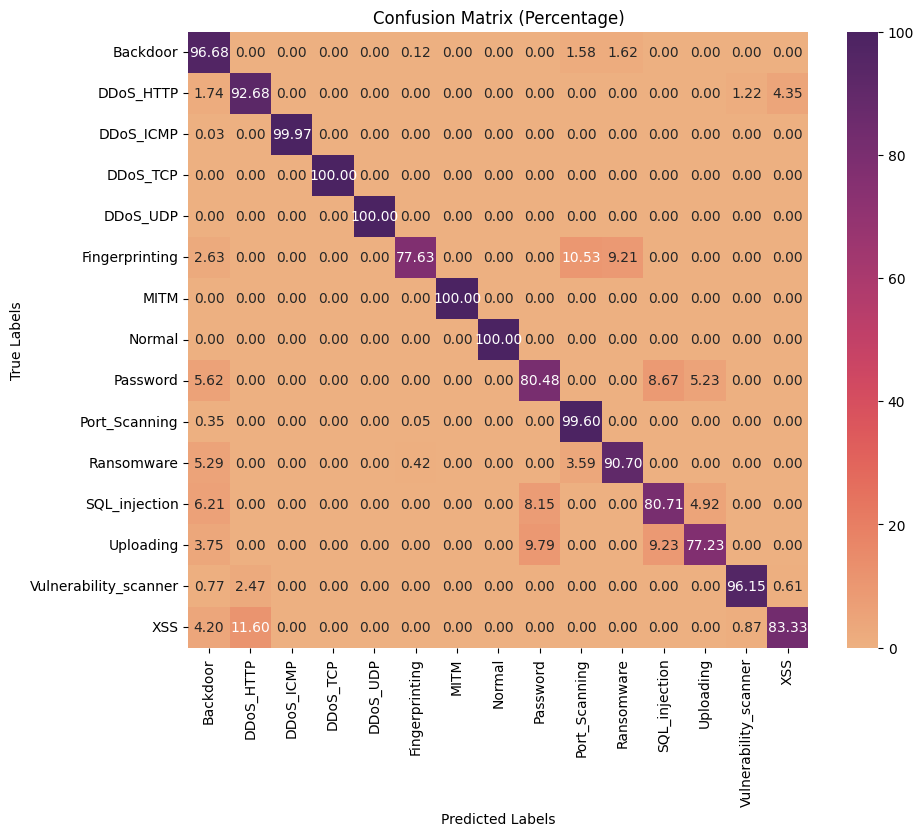

In [ ]:
import numpy as np


# Convert one-hot encoded labels back to class labels
y_pred_labels = np.argmax(y_pred_rf, axis=1)
y_true_labels = np.argmax(y_multi_test, axis=1)


cm = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Now you can visualize the confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="flare",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentage)")
plt.show()


In [ ]:
with open('model.pkl','wb') as f:
    pickle.dump(rf_classifier,f)

## Logistic regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9213480792593524
Logistic Regression Training Accuracy: 0.9210734053527573
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2528
           1       0.77      0.73      0.75      4823
           2       1.00      0.99      0.99      6860
           3       1.00      0.56      0.72      4971
           4       1.00      1.00      1.00     12267
           5       0.16      0.89      0.27        76
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00    136263
           8       0.54      0.20      0.29      4950
           9       0.48      1.00      0.64      2024
          10       0.36      0.28      0.32       946
          11       0.39      0.49      0.44      4956
          12       0.30      0.46      0.36      3707
          13       0.94      0.83      0.88      5070
          14       0.30      0.48      0.37      1500

    accuracy               

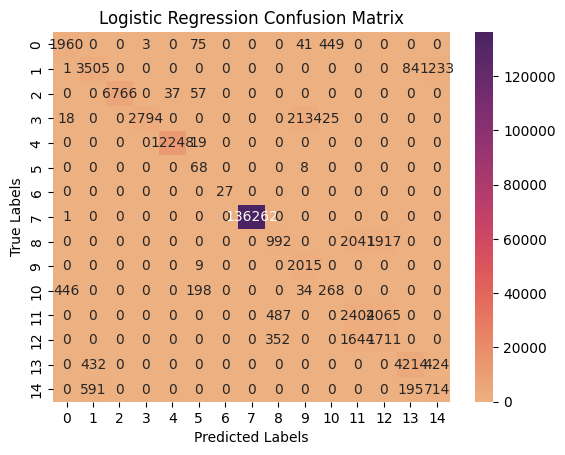

In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_regression.fit(X_train, np.argmax(y_multi_train, axis=1))  # Use argmax to get the class labels

y_pred_lr = logistic_regression.predict(X_test)
y_train_pred_lr = logistic_regression.predict(X_train)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(np.argmax(y_multi_test, axis=1), y_pred_lr)
accuracy_train_lr = accuracy_score(np.argmax(y_multi_train, axis=1), y_train_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Training Accuracy:", accuracy_train_lr)


# Generate and print the classification report for Logistic Regression
print(classification_report(np.argmax(y_multi_test, axis=1), y_pred_lr))

# Calculate and plot the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(np.argmax(y_multi_test, axis=1), y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='flare', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


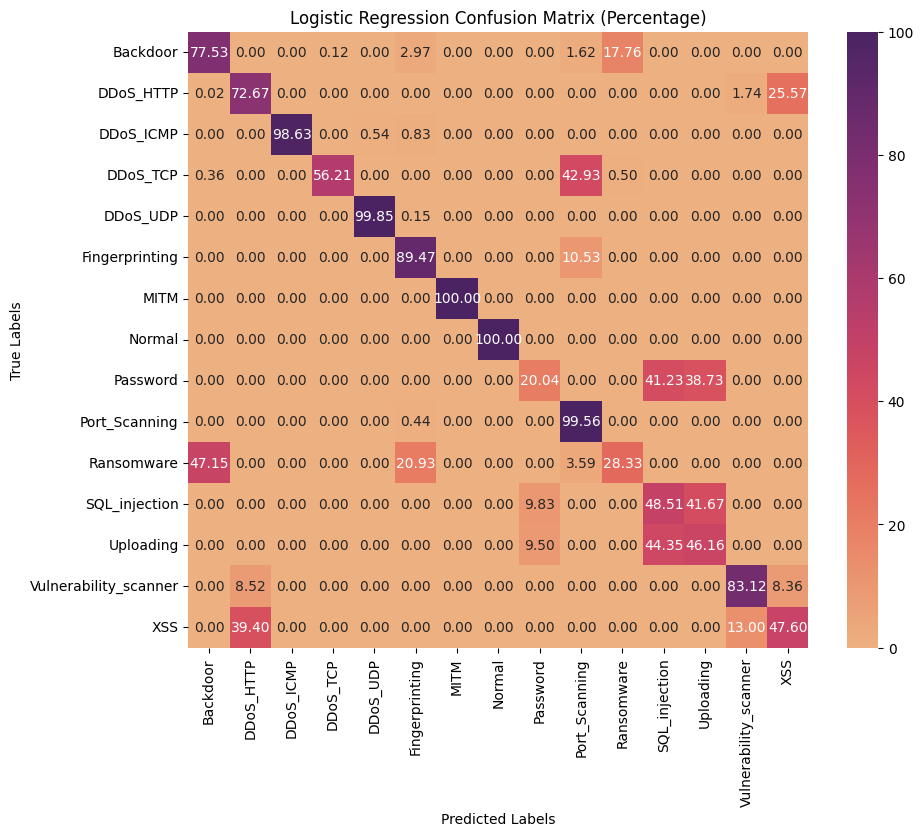

In [ ]:

# Calculate percentages for Logistic Regression confusion matrix
cm_lr_percentage = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr_percentage, annot=True, fmt=".2f", cmap="flare",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix (Percentage)")
plt.show()


## NON-parameterized neural network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - accuracy: 0.8811 - loss: 0.3377 - val_accuracy: 0.9255 - val_loss: 0.1520
Epoch 2/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9264 - loss: 0.1570 - val_accuracy: 0.9383 - val_loss: 0.1248
Epoch 3/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9347 - loss: 0.1382 - val_accuracy: 0.9392 - val_loss: 0.1192
Epoch 4/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9373 - loss: 0.1315 - val_accuracy: 0.9397 - val_loss: 0.1193
Epoch 5/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9384 - loss: 0.1277 - val_accuracy: 0.9423 - val_loss: 0.1149
Epoch 6/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9397 - loss: 0.1244 - val_accuracy: 0.9392 - val_loss: 0.1204
Epoch 7/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9407 - loss: 0.1230 - val_accuracy: 0.9424 - val_loss: 0.1133
Epoch 8/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9410 -

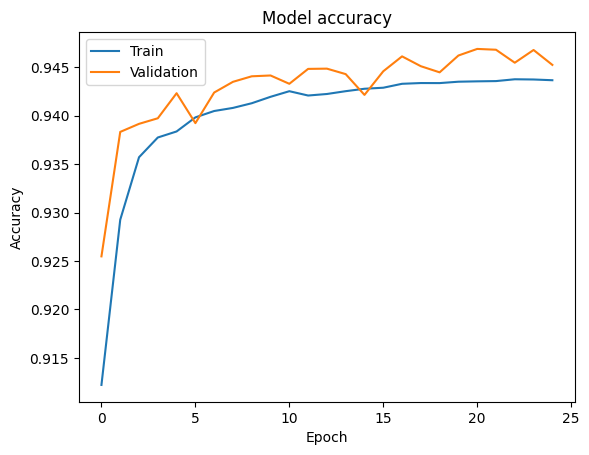

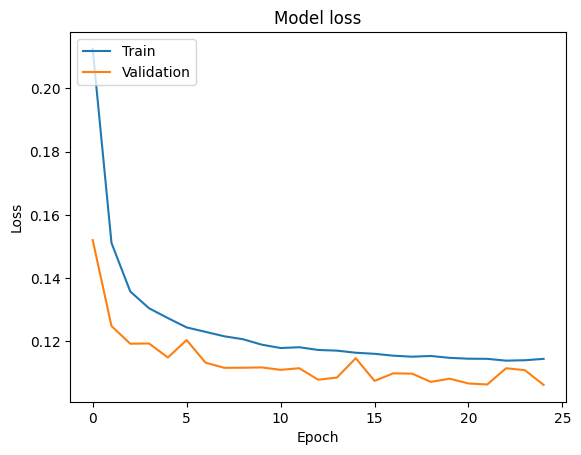

In [ ]:
from keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(y_multi_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
# Train the model
history = model.fit(X_train, y_multi_train, epochs=25, batch_size=800,
                    validation_data=(X_val, y_multi_val),
                    class_weight=class_weights_multi_dict,
                    callbacks=[earlystopping]  )


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_multi_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


5968/5968 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
                       precision    recall  f1-score   support

             Backdoor       0.94      0.98      0.96      2528
            DDoS_HTTP       0.70      0.98      0.82      4823
            DDoS_ICMP       0.99      0.99      0.99      6860
             DDoS_TCP       0.82      1.00      0.90      4971
             DDoS_UDP       1.00      1.00      1.00     12267
       Fingerprinting       1.00      0.01      0.03        76
                 MITM       1.00      1.00      1.00        27
               Normal       1.00      1.00      1.00    136263
             Password       0.44      0.91      0.59      4950
        Port_Scanning       1.00      0.49      0.66      2024
           Ransomware       0.99      0.82      0.90       946
        SQL_injection       0.50      0.26      0.34      4956
            Uploading       1.00      0.22      0.35      3707
Vulnerability_scanner       0.97      0.85      0.91      5070
          

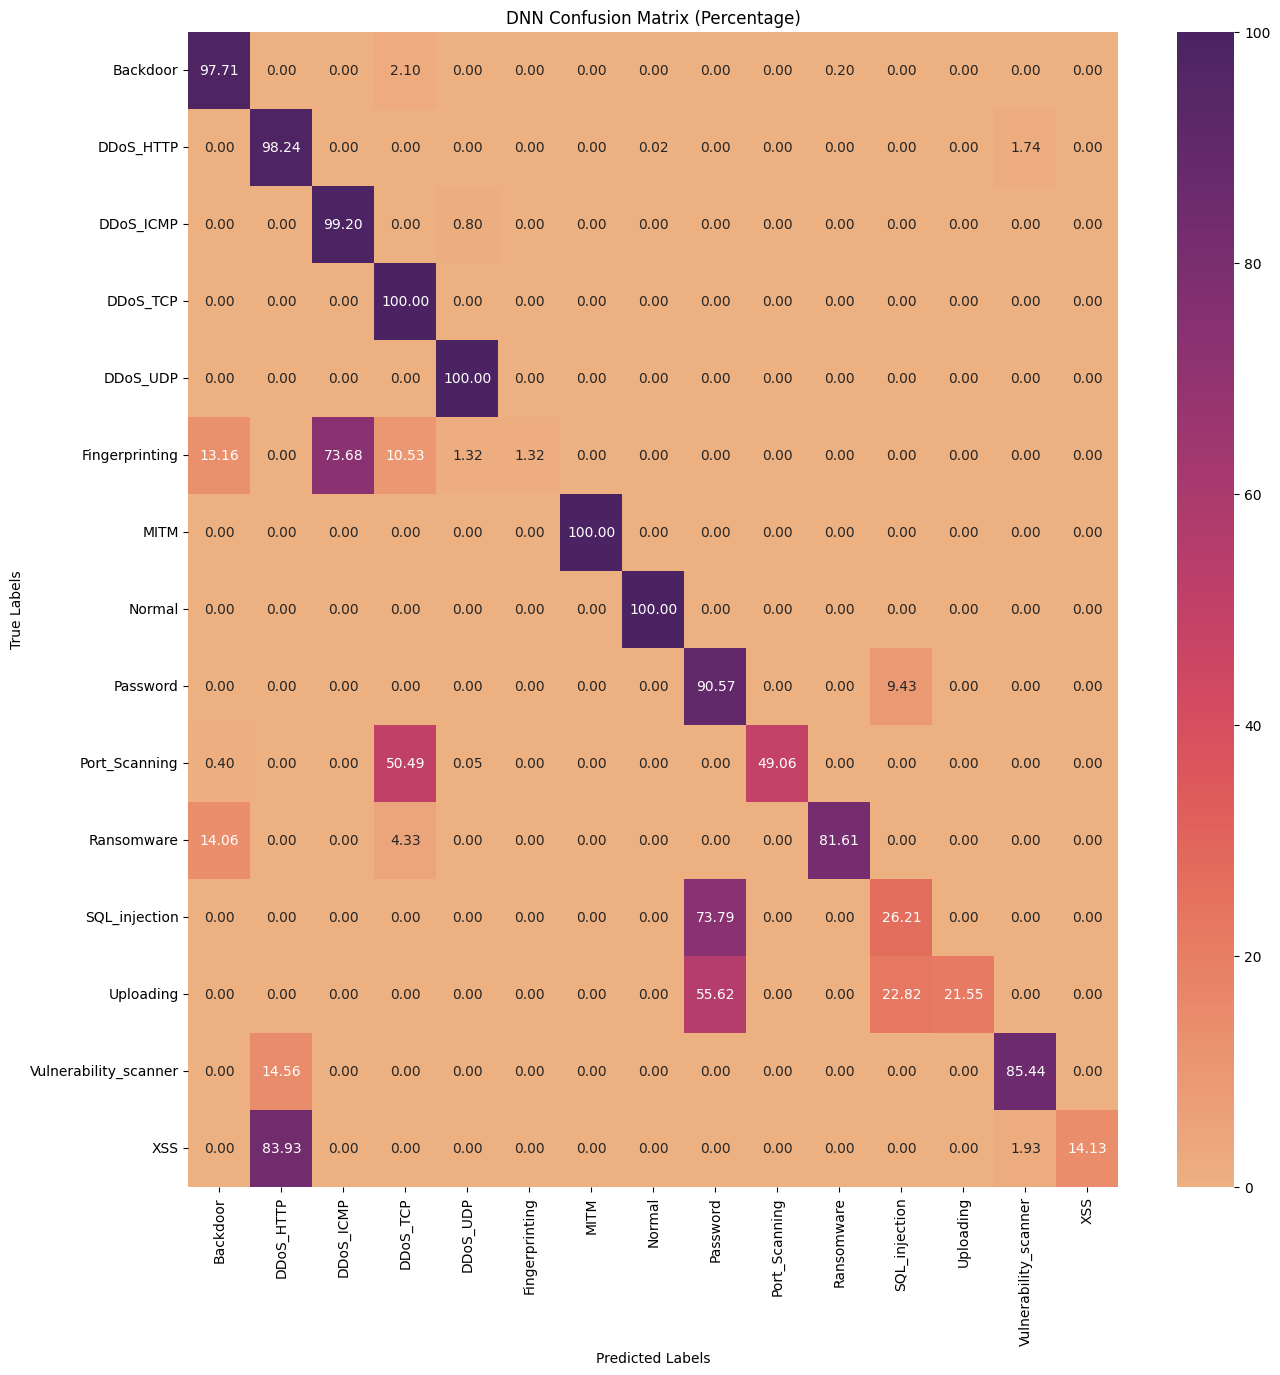

In [ ]:
# Make predictions on the test set
y_pred_dnn = model.predict(X_test)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)
y_true_classes = np.argmax(y_multi_test, axis=1)

# Convert numerical labels back to original attack type names
y_pred_names = label_encoder.inverse_transform(y_pred_dnn_classes)
y_true_names = label_encoder.inverse_transform(y_true_classes)

# Generate and print the classification report with attack type names
print(classification_report(y_true_names, y_pred_names))


# Calculate the confusion matrix
cm_dnn = confusion_matrix(y_true_names, y_pred_names)  # Use names directly

# Convert counts to percentages per row
cm_dnn_percent = cm_dnn.astype('float') / cm_dnn.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(15,15))
# Plot the percentage confusion matrix with attack type names
sns.heatmap(cm_dnn_percent, annot=True, cmap='flare', fmt='.2f',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  # Use label_encoder.classes_ for names
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DNN Confusion Matrix (Percentage)')
plt.show()

## Hyper parameterized neural network

**Hyper parameter Tuning**

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import StratifiedKFold
import keras_tuner
import keras

In [ ]:
#
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 4)): #adding more layers
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(keras.layers.Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(y_multi_train.shape[1], activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=5,  # Increase for better results, but it'll take more time
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)

tuner.search(X_train, y_multi_train, epochs=10, validation_data=(X_val, y_multi_val),class_weight=class_weights_multi_dict)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_1')}, in the second layer is {best_hps.get('units_2')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_multi_train, epochs=50, validation_data=(X_val, y_multi_val),class_weight=class_weights_multi_dict)

eval_result = model.evaluate(X_test, y_multi_test)
print("[test loss, test accuracy]:", eval_result)



Trial 5 Complete [02h 18m 52s]
val_accuracy: 0.9488149086634318

Best val_accuracy So Far: 0.9488149086634318
Total elapsed time: 10h 43m 49s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448, in the second layer is 224 and the optimal learning rate for the optimizer
is 0.0001.

Epoch 1/50
47742/47742 ━━━━━━━━━━━━━━━━━━━━ 251s 5ms/step - accuracy: 0.9229 - loss: 0.1880 - val_accuracy: 0.9420 - val_loss: 0.1154
Epoch 2/50
47742/47742 ━━━━━━━━━━━━━━━━━━━━ 247s 5ms/step - accuracy: 0.9438 - loss: 0.1146 - val_accuracy: 0.9460 - val_loss: 0.1077
Epoch 3/50
47742/47742 ━━━━━━━━━━━━━━━━━━━━ 265s 5ms/step - accuracy: 0.9463 - loss: 0.1081 - val_accuracy: 0.9472 - val_loss: 0.1051
Epoch 4/50
47742/47742 ━━━━━━━━━━━━━━━━━━━━ 261s 5ms/step - accuracy: 0.9470 - loss: 0.1053 - val_accuracy: 0.9477 - val_loss: 0.1033
Epoch 5/50
47742/47742 ━━━━━━━━━━━━━━━━━━━━ 255s 5ms/step - accuracy: 0.9476 - loss: 0.1040 - val_accuracy: 0.9483 - val_l

Creating a model using the proposed hyperparameters

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Build the model with the best hyperparameters
def build_best_model():
    model = keras.Sequential([
        keras.layers.Dense(448, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.1),  # Adjust dropout value based on tuned results
        keras.layers.Dense(224, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(y_multi_train.shape[1], activation='softmax')
    ])

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
# model = build_best_model()

# # Train the model
# history = model.fit(
#     X_train, y_multi_train,
#     epochs=25,
#     batch_size = 800,
#     validation_data=(X_val, y_multi_val),
#     class_weight=class_weights_multi_dict
# )

# # Evaluate on the test set
# eval_result = model.evaluate(X_test, y_multi_test)
# print("[Test Loss, Test Accuracy]:", eval_result)


5968/5968 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
                       precision    recall  f1-score   support

             Backdoor       0.94      0.98      0.96      2528
            DDoS_HTTP       0.70      0.98      0.82      4823
            DDoS_ICMP       0.99      0.99      0.99      6860
             DDoS_TCP       0.82      1.00      0.90      4971
             DDoS_UDP       1.00      1.00      1.00     12267
       Fingerprinting       1.00      0.01      0.03        76
                 MITM       1.00      1.00      1.00        27
               Normal       1.00      1.00      1.00    136263
             Password       0.44      0.91      0.59      4950
        Port_Scanning       1.00      0.49      0.66      2024
           Ransomware       0.99      0.82      0.90       946
        SQL_injection       0.50      0.26      0.34      4956
            Uploading       1.00      0.22      0.35      3707
Vulnerability_scanner       0.97      0.85      0.91      5070
          

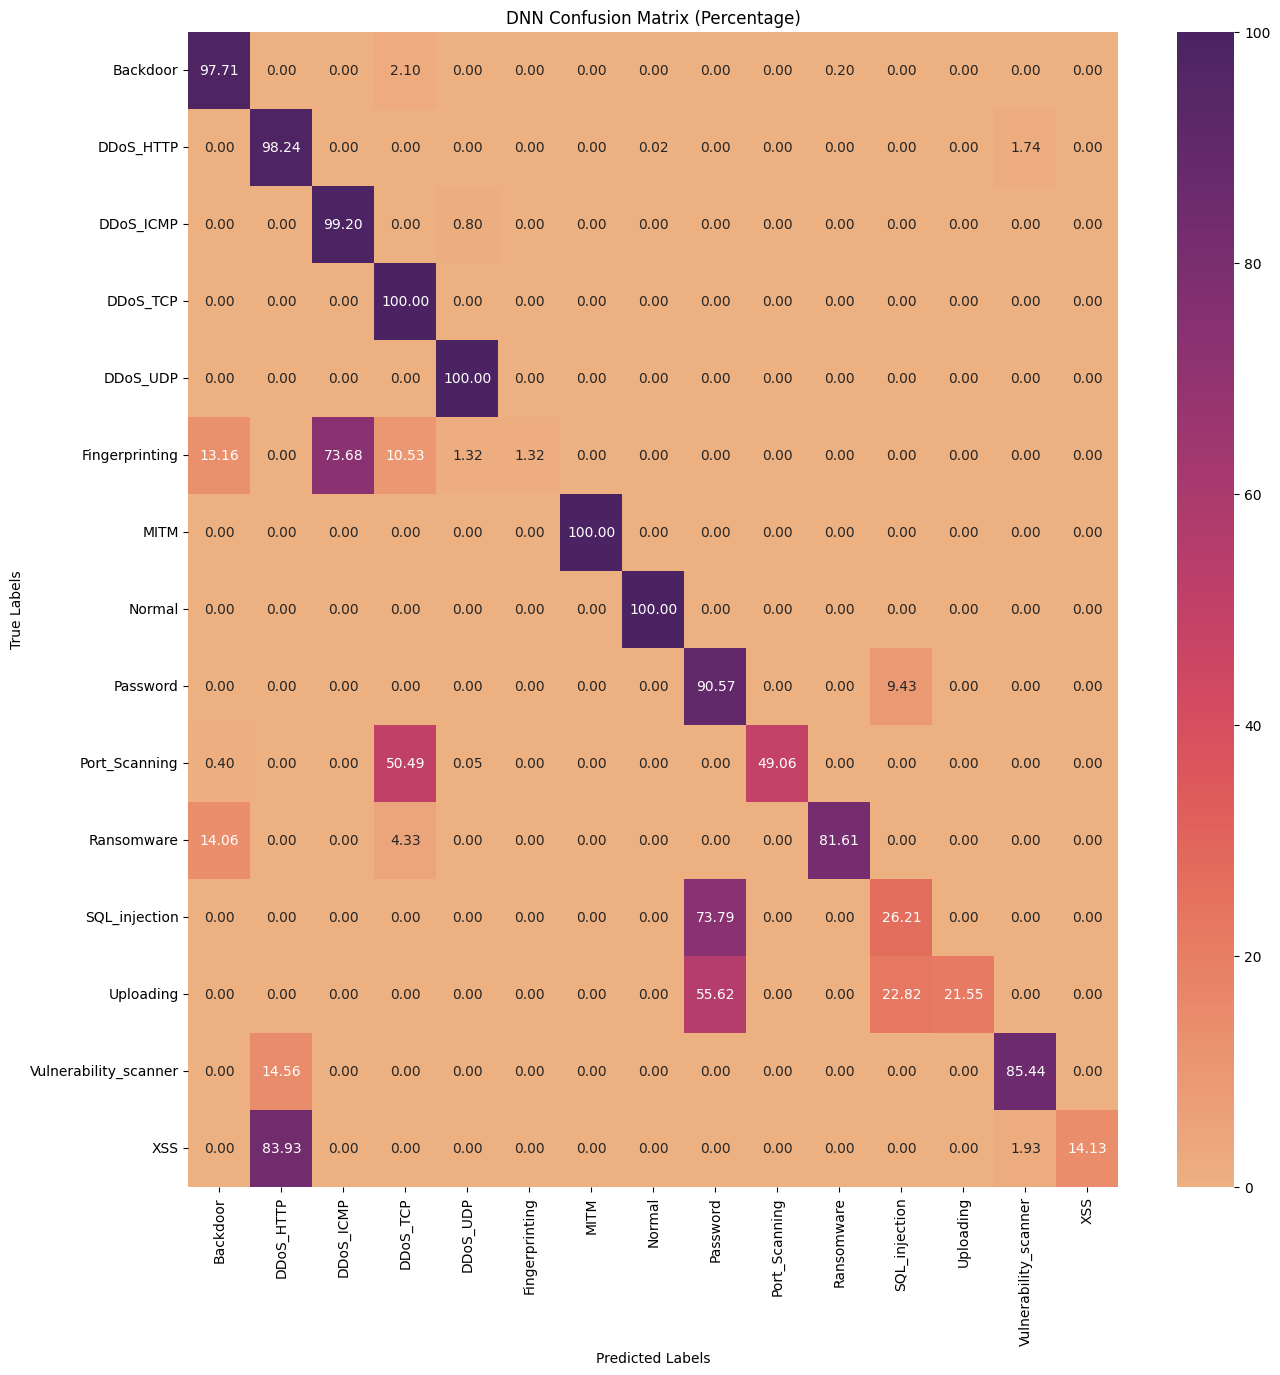

In [ ]:
y_pred_dnn = model.predict(X_test)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)
y_true_classes = np.argmax(y_multi_test, axis=1)

# Convert numerical labels back to original attack type names
y_pred_names = label_encoder.inverse_transform(y_pred_dnn_classes)
y_true_names = label_encoder.inverse_transform(y_true_classes)

# Generate and print the classification report with attack type names
print(classification_report(y_true_names, y_pred_names))

# Calculate the confusion matrix using attack type names
cm_dnn = confusion_matrix(y_true_names, y_pred_names)

# Convert counts to percentages per row
cm_dnn_percent = cm_dnn.astype('float') / cm_dnn.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(15,15))

# Plot the percentage confusion matrix with attack type names
sns.heatmap(cm_dnn_percent, annot=True, cmap='flare', fmt='.2f',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DNN Confusion Matrix (Percentage)')
plt.show()

In [ ]:



# Save the Keras DNN model
model.save('dnn_model.h5')



AFTER HYPER-parameter tuning of the model, the performance has considerably increased.


## Non-hyperparamterized
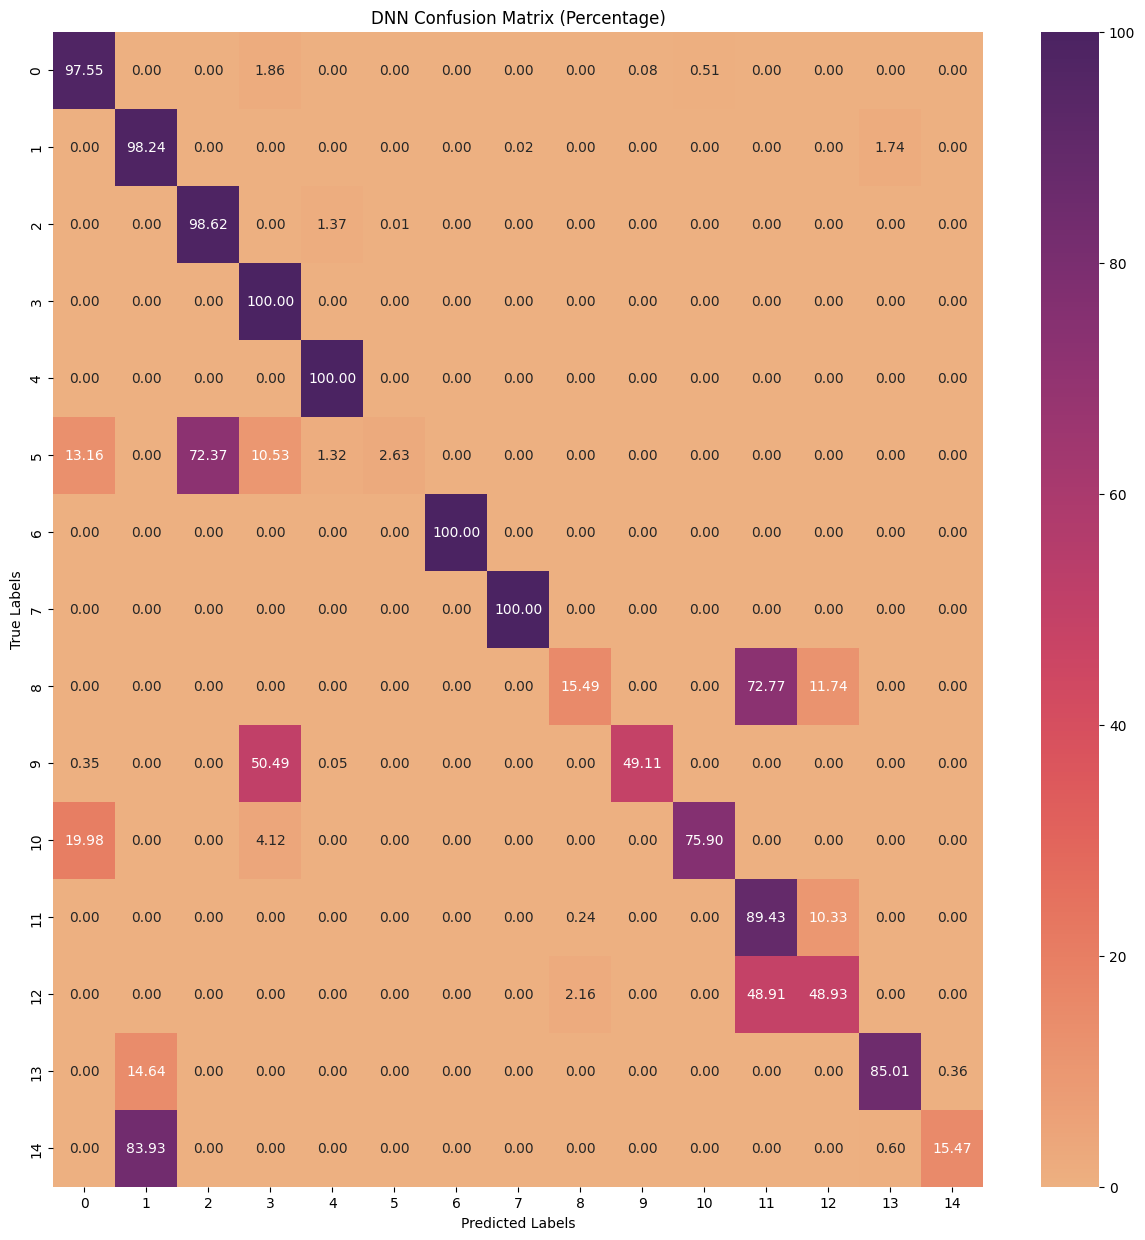
## Hyper-parameterized
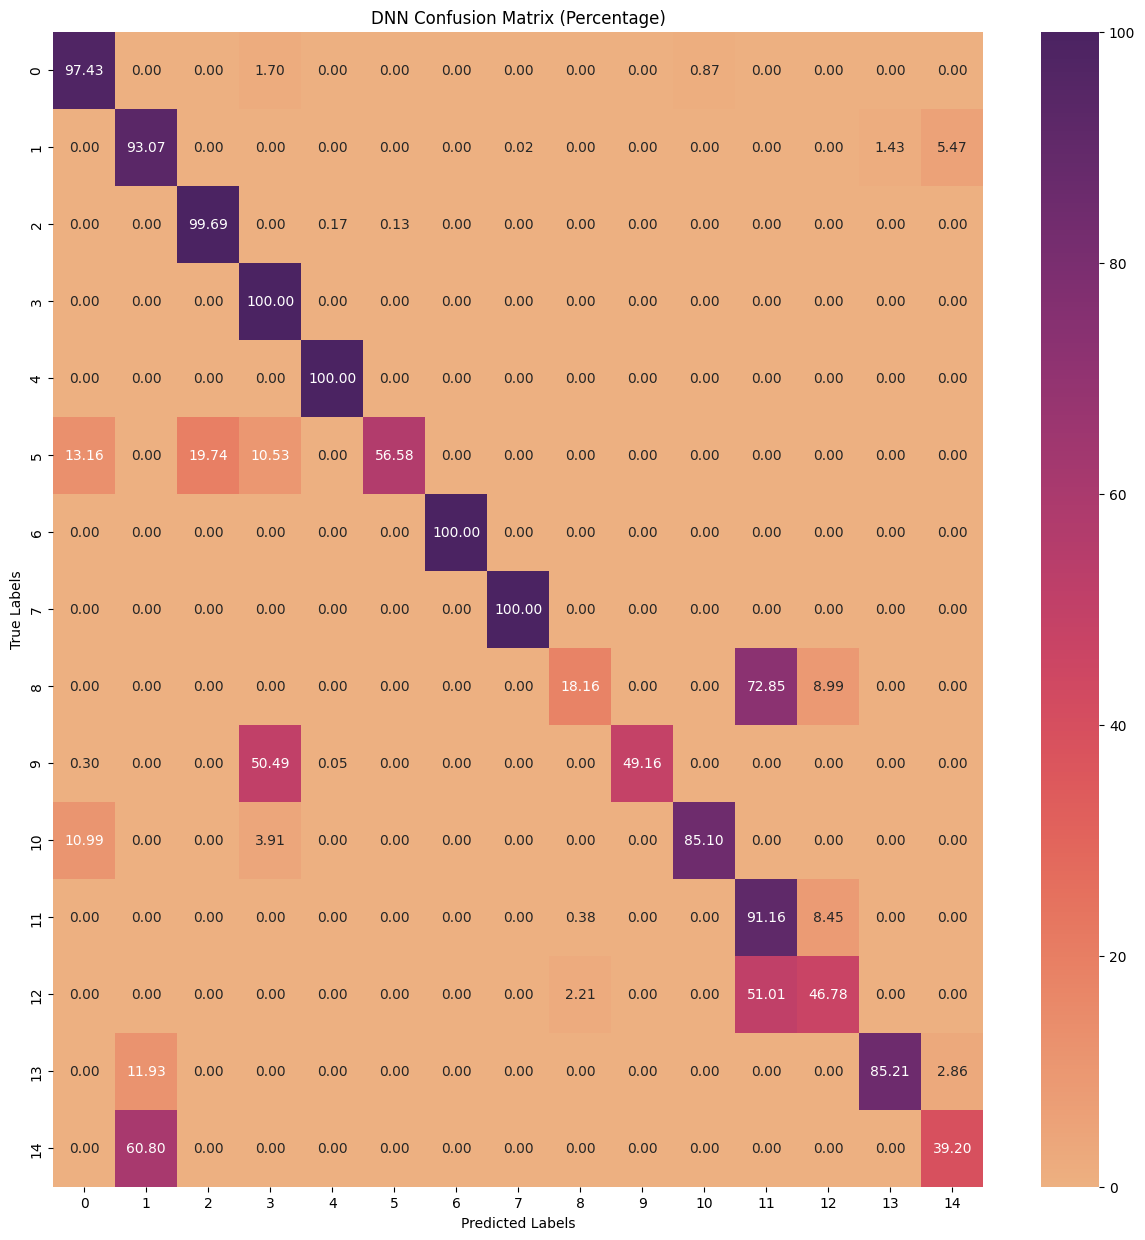

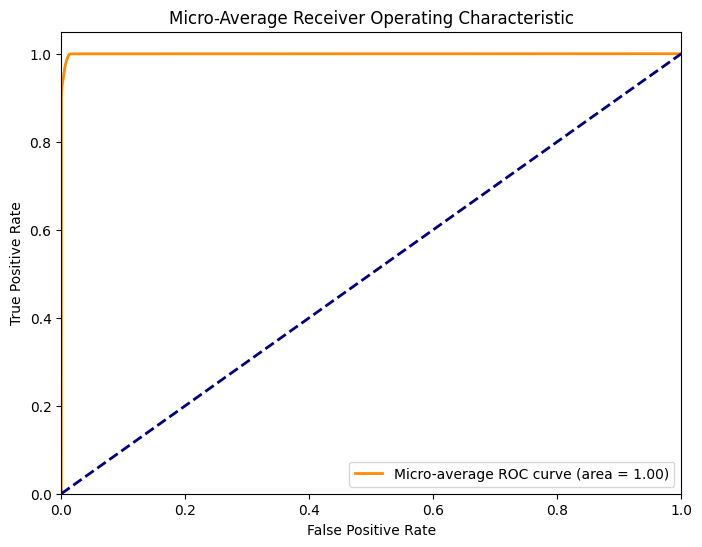

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# If your true labels are not already in binary format, convert them:
# Assume y_multi_test is one-hot encoded; if not, do:
# y_true = np.argmax(y_multi_test, axis=1)
# y_multi_test_binary = label_binarize(y_true, classes=range(num_classes))
y_multi_test_binary = y_multi_test  # if already one-hot

# Compute micro-average ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_multi_test_binary.ravel(), y_pred_dnn.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Micro-average ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## Modeling with cross-validation (Kfold):


In [ ]:
def train_model_with_kfold(X, y, model, n_splits=10, random_state=42):
    """
    Trains a model using stratified k-fold cross-validation.

    Args:
        X: The feature data.
        y: The target variable (must be single-label, not one-hot encoded).
        model: The model to train.
        n_splits: The number of folds for cross-validation.
        random_state: Random seed for reproducibility.

    Returns:
        A dictionary containing the trained model and the results.
    """

    # Convert one-hot encoded labels to class labels for StratifiedKFold
    y_classes = np.argmax(y, axis=1)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    results = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y_classes)): # Use y_classes for splitting
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_val)

        # Evaluate the model
        accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

        results.append({'fold': fold + 1, 'accuracy': accuracy})
        print(f"Fold {fold + 1} Accuracy: {accuracy}")

    return {'model': model, 'results': results}

In [ ]:
model = build_best_model()
results = train_model_with_kfold(X_train,y_multi_train,model)
print(results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42968/42968 ━━━━━━━━━━━━━━━━━━━━ 231s 5ms/step - accuracy: 0.9253 - loss: 0.1838
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Fold 1 Accuracy: 0.9432756882715645
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 234s 5ms/step - accuracy: 0.9443 - loss: 0.1137
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Fold 2 Accuracy: 0.9443360781284773
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 229s 5ms/step - accuracy: 0.9463 - loss: 0.1080
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Fold 3 Accuracy: 0.9472226949611845
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 232s 5ms/step - accuracy: 0.9467 - loss: 0.1057
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Fold 4 Accuracy: 0.9470132352363622
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 228s 5ms/step - accuracy: 0.9473 - loss: 0.1040
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Fold 5 Accuracy: 0.9473012423579928
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 236s 5ms/step - accuracy: 0.9474 - loss: 0.1038
4775/4775 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Fold 6 Accuracy: 0.948440179611714
42968/42968 ━━━━━━━━━━━━━━━━━━━━ 222s 5m

In [ ]:
import numpy as np

def mean_accuracy(results):

    accuracies = [fold_result['accuracy'] for fold_result in results['results']]
    mean_acc = np.mean(accuracies)
    return mean_acc

# Example usage (assuming 'results' is defined as in your provided code):
mean_acc = mean_accuracy(results)
print(f"Mean Accuracy: {mean_acc}")


Mean Accuracy: 0.9472448157795432


In [ ]:
model.evaluate(X_test,y_multi_test)

5968/5968 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9475 - loss: 0.1020


[0.10287447273731232, 0.9480488896369934]

5968/5968 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


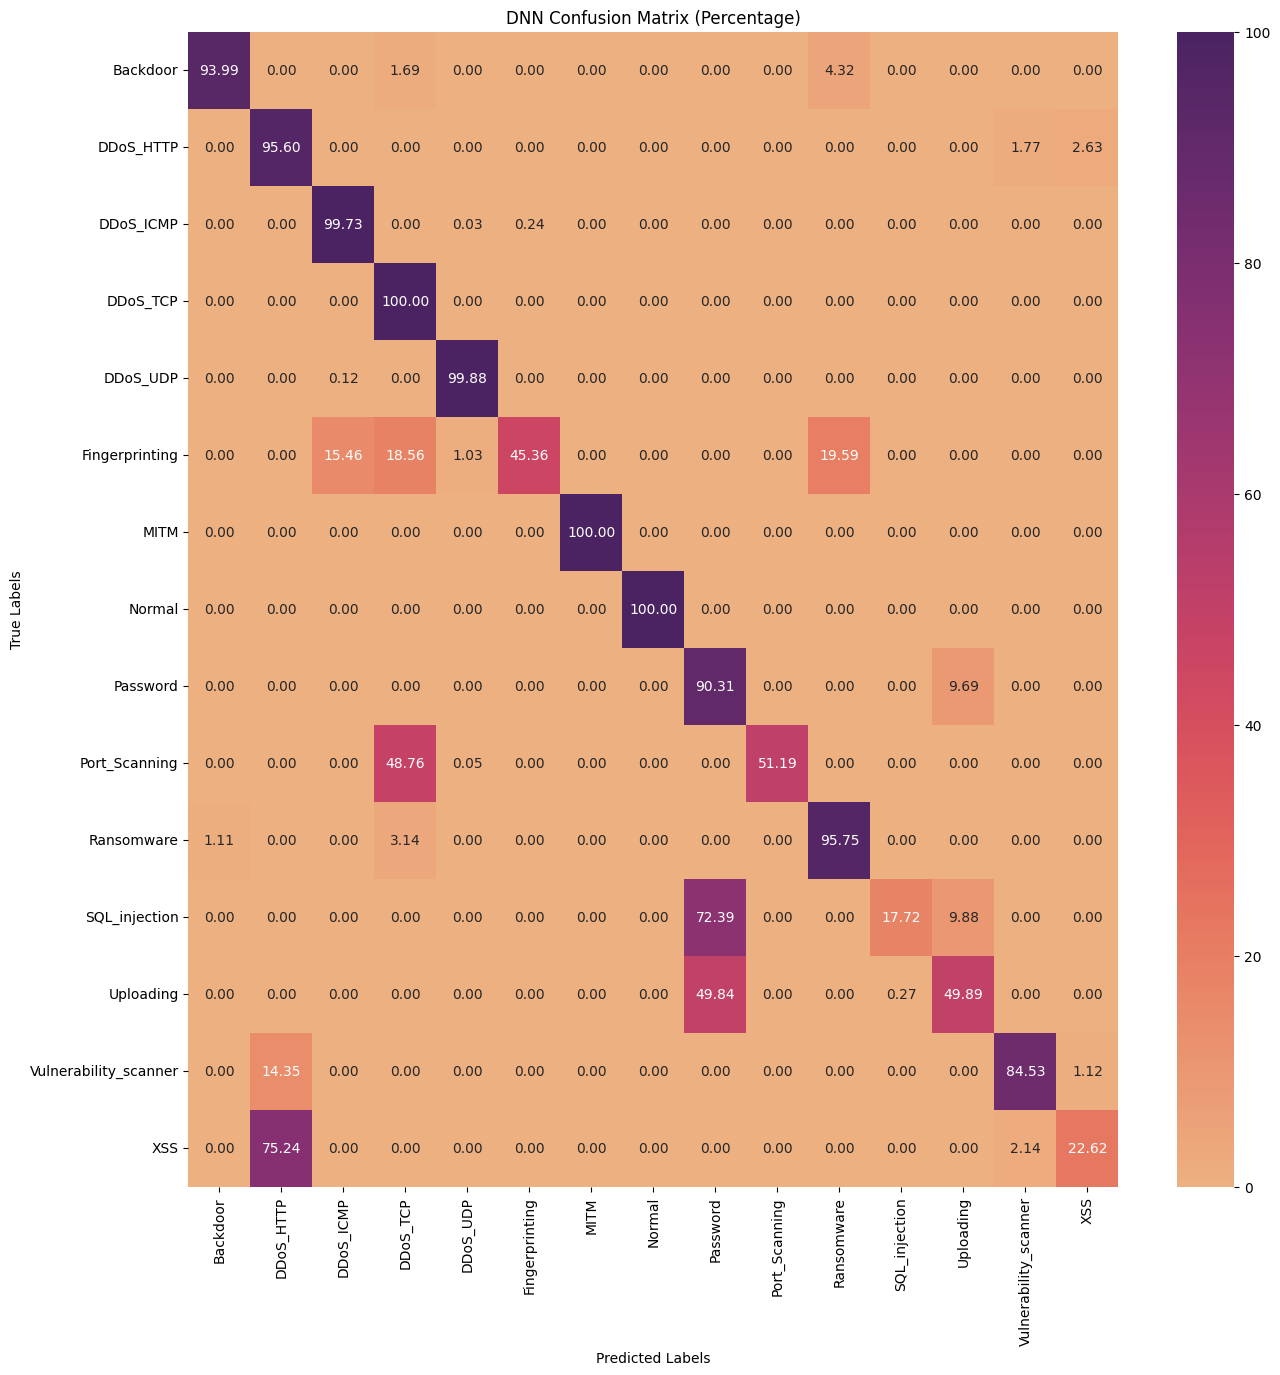

In [ ]:
y_pred = model.predict(X_val)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure y_true_classes is numerical (using label_encoder from your global variables)
y_true_classes = label_encoder.transform(y_val)

# Create the confusion matrix
cm_dnn = confusion_matrix(y_true_classes, y_pred_classes)

# Convert counts to percentages per row
cm_dnn_percent = cm_dnn.astype('float') / cm_dnn.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(15,15))
# Plot the percentage confusion matrix with labels
sns.heatmap(cm_dnn_percent, annot=True, cmap='flare', fmt='.2f',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DNN Confusion Matrix (Percentage)')
plt.show()

# The best model to use is the random forest model.

# Training model, without using class-weights:
## Random forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_multi_train)
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_multi_test, y_pred_rf)
accuracy_train_rf = accuracy_score(y_multi_train, y_train_pred_rf)




In [ ]:
print("Testing accuracy of the random forest is:",accuracy_rf)
print("Training accuracy of the random forest is:",accuracy_train_rf)

Testing accuracy of the random forest is: 0.9802584726236856
Training accuracy of the random forest is: 0.9991772138641755


In [ ]:
print(classification_report(y_multi_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2528
           1       0.94      0.93      0.93      4823
           2       1.00      1.00      1.00      6860
           3       1.00      1.00      1.00      4971
           4       1.00      1.00      1.00     12267
           5       0.89      0.78      0.83        76
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00    136263
           8       0.84      0.80      0.82      4950
           9       0.96      1.00      0.98      2024
          10       0.95      0.90      0.92       946
          11       0.84      0.81      0.82      4956
          12       0.85      0.77      0.81      3707
          13       0.99      0.96      0.97      5070
          14       0.85      0.83      0.84      1500

   micro avg       0.99      0.98      0.98    190968
   macro avg       0.94      0.92      0.93    190968
weighted avg       0.98   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


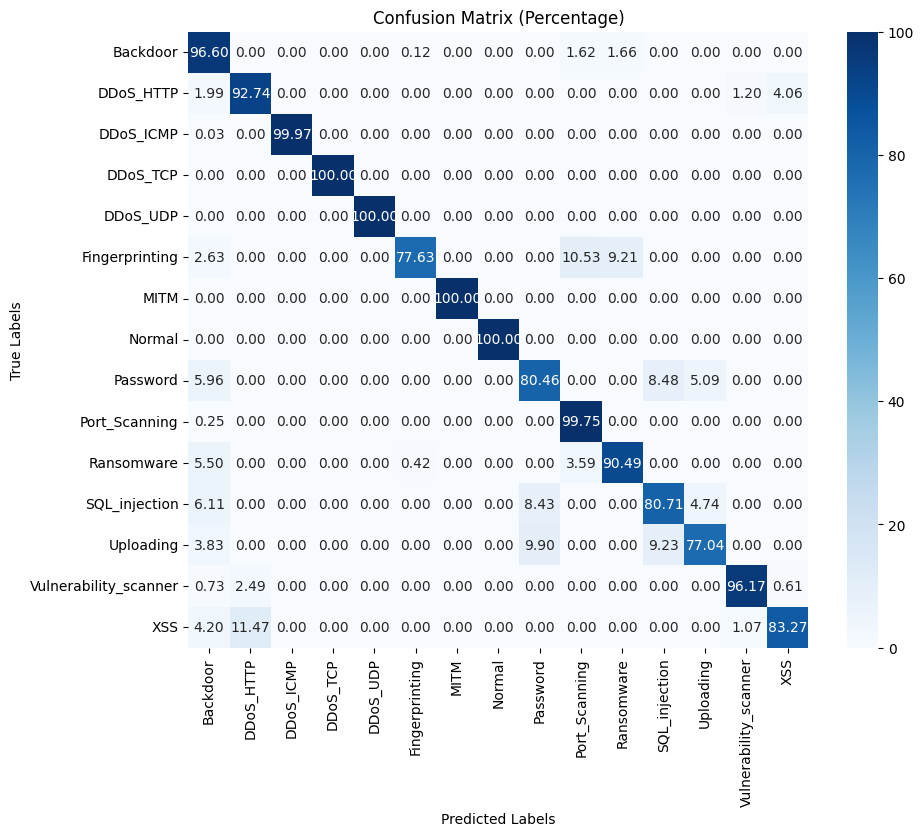

In [ ]:
import numpy as np


# Convert one-hot encoded labels back to class labels
y_pred_labels = np.argmax(y_pred_rf, axis=1)
y_true_labels = np.argmax(y_multi_test, axis=1)


cm = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Now you can visualize the confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Logistic regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9216832139416028
Logistic Regression Training Accuracy: 0.921434069760744
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2528
           1       0.77      0.72      0.75      4823
           2       1.00      0.99      0.99      6860
           3       1.00      0.56      0.72      4971
           4       1.00      1.00      1.00     12267
           5       0.16      0.89      0.27        76
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00    136263
           8       0.55      0.21      0.30      4950
           9       0.48      1.00      0.64      2024
          10       0.37      0.28      0.32       946
          11       0.40      0.50      0.44      4956
          12       0.30      0.44      0.36      3707
          13       0.94      0.83      0.88      5070
          14       0.30      0.48      0.37      1500

    accuracy                

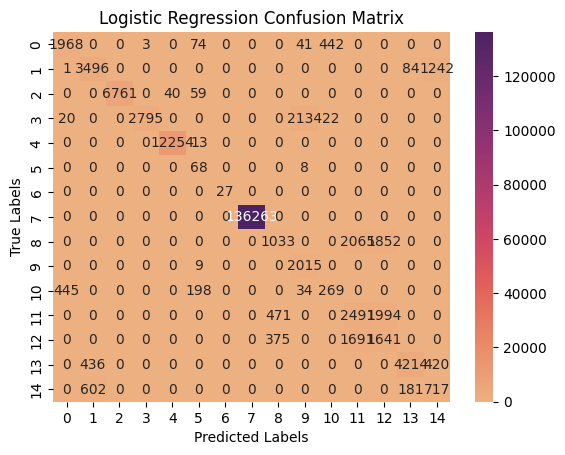

In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_regression.fit(X_train, np.argmax(y_multi_train, axis=1))  # Use argmax to get the class labels

y_pred_lr = logistic_regression.predict(X_test)
y_train_pred_lr = logistic_regression.predict(X_train)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(np.argmax(y_multi_test, axis=1), y_pred_lr)
accuracy_train_lr = accuracy_score(np.argmax(y_multi_train, axis=1), y_train_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Training Accuracy:", accuracy_train_lr)


# Generate and print the classification report for Logistic Regression
print(classification_report(np.argmax(y_multi_test, axis=1), y_pred_lr))

# Calculate and plot the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(np.argmax(y_multi_test, axis=1), y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='flare', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Build the model with the best hyperparameters
def build_best_model():
    model = keras.Sequential([
        keras.layers.Dense(448, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.1),  # Adjust dropout value based on tuned results
        keras.layers.Dense(224, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(y_multi_train.shape[1], activation='softmax')
    ])

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
model = build_best_model()

# Train the model
history = model.fit(
    X_train, y_multi_train,
    epochs=25,
    batch_size = 800,
    validation_data=(X_val, y_multi_val),
)

# Evaluate on the test set
eval_result = model.evaluate(X_test, y_multi_test)
print("[Test Loss, Test Accuracy]:", eval_result)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8916 - loss: 0.4640 - val_accuracy: 0.9268 - val_loss: 0.1587
Epoch 2/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9268 - loss: 0.1579 - val_accuracy: 0.9387 - val_loss: 0.1404
Epoch 3/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9344 - loss: 0.1400 - val_accuracy: 0.9410 - val_loss: 0.1251
Epoch 4/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9395 - loss: 0.1268 - val_accuracy: 0.9423 - val_loss: 0.1185
Epoch 5/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9415 - loss: 0.1202 - val_accuracy: 0.9438 - val_loss: 0.1153
Epoch 6/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9425 - loss: 0.1166 - val_accuracy: 0.9445 - val_loss: 0.1129
Epoch 7/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9439 - loss: 0.1138 - val_accuracy: 0.9461 - val_loss: 0.1109
Epoch 8/25
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9449 - loss: 0.11

No change in accuracy. whether we balance the class weights or not (0.0003 difference. not worth noting). Might indicate errors.

# Next- step: See the changes in the accuracy if we take the features as input which were previously not taken
